In [12]:
from sklearn.datasets import fetch_openml
boston = fetch_openml("boston")
boston

C:\Users\Keun Ho Ryu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\datasets\_openml.py:311: UserWarning: Multiple active versions of the dataset matching the name boston exist. Versions may be fundamentally different, returning version 1.
  warn(
C:\Users\Keun Ho Ryu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\datasets\_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


{'data':         CRIM    ZN  INDUS CHAS    NOX     RM   AGE     DIS RAD    TAX  \
 0    0.00632  18.0   2.31    0  0.538  6.575  65.2  4.0900   1  296.0   
 1    0.02731   0.0   7.07    0  0.469  6.421  78.9  4.9671   2  242.0   
 2    0.02729   0.0   7.07    0  0.469  7.185  61.1  4.9671   2  242.0   
 3    0.03237   0.0   2.18    0  0.458  6.998  45.8  6.0622   3  222.0   
 4    0.06905   0.0   2.18    0  0.458  7.147  54.2  6.0622   3  222.0   
 ..       ...   ...    ...  ...    ...    ...   ...     ...  ..    ...   
 501  0.06263   0.0  11.93    0  0.573  6.593  69.1  2.4786   1  273.0   
 502  0.04527   0.0  11.93    0  0.573  6.120  76.7  2.2875   1  273.0   
 503  0.06076   0.0  11.93    0  0.573  6.976  91.0  2.1675   1  273.0   
 504  0.10959   0.0  11.93    0  0.573  6.794  89.3  2.3889   1  273.0   
 505  0.04741   0.0  11.93    0  0.573  6.030  80.8  2.5050   1  273.0   
 
      PTRATIO       B  LSTAT  
 0       15.3  396.90   4.98  
 1       17.8  396.90   9.14  
 2       

In [13]:
x = boston["data"]
y = boston["target"]

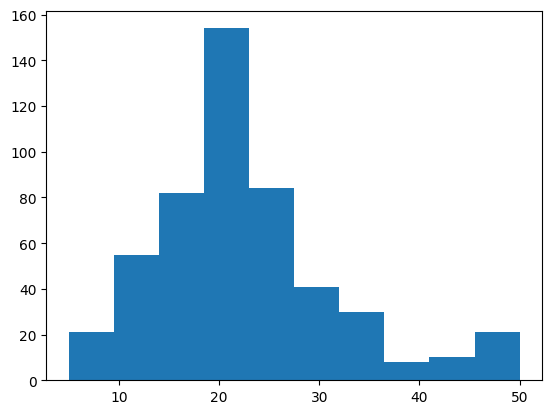

In [14]:
import matplotlib.pyplot as plt

plt.hist(y)
plt.show()

In [15]:
x.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [16]:
x.isnull().sum(axis=0)

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [17]:
for col in x.columns:
    print(col, x[col].dtype, len(x[col].unique()))

CRIM float64 504
ZN float64 26
INDUS float64 76
CHAS category 2
NOX float64 81
RM float64 446
AGE float64 356
DIS float64 412
RAD category 9
TAX float64 66
PTRATIO float64 46
B float64 357
LSTAT float64 455


In [18]:
#create dummy variable 
cat_cols = ["CHAS", "RAD"]
for col in cat_cols:
    for val in x[col].unique()[:-1]:
        x[f"{col}_{val}_dummy"] = 0
        x.loc[x[col]==val, f"{col}_{val}_dummy"]=1

In [19]:
x.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'CHAS_0_dummy', 'RAD_1_dummy', 'RAD_2_dummy',
       'RAD_3_dummy', 'RAD_5_dummy', 'RAD_4_dummy', 'RAD_8_dummy',
       'RAD_6_dummy', 'RAD_7_dummy'],
      dtype='object')

In [20]:
x = x.drop(cat_cols, axis=1)

In [21]:
x.head()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,CHAS_0_dummy,RAD_1_dummy,RAD_2_dummy,RAD_3_dummy,RAD_5_dummy,RAD_4_dummy,RAD_8_dummy,RAD_6_dummy,RAD_7_dummy
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,296.0,15.3,396.90,4.98,1,1,0,0,0,0,0,0,0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,242.0,17.8,396.90,9.14,1,0,1,0,0,0,0,0,0
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,242.0,17.8,392.83,4.03,1,0,1,0,0,0,0,0,0
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,222.0,18.7,394.63,2.94,1,0,0,1,0,0,0,0,0
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,222.0,18.7,396.90,5.33,1,0,0,1,0,0,0,0,0


In [22]:
from sklearn.linear_model import LinearRegression, LogisticRegression

In [23]:
reg = LinearRegression().fit(x, y)

In [24]:
reg.coef_

array([-1.08820969e-01,  5.48963806e-02,  2.37603048e-02, -1.75731321e+01,
        3.66549065e+00,  4.61005463e-04, -1.55454614e+00, -8.74817525e-03,
       -9.72419369e-01,  9.39380293e-03, -5.29225821e-01, -2.52416312e+00,
       -7.46167440e+00, -5.97276929e+00, -2.78042094e+00, -4.54318162e+00,
       -4.88544052e+00, -2.62183847e+00, -6.27583590e+00, -2.58268228e+00])

In [26]:
import pandas as pd
res = pd.DataFrame()
res['variables'] = x.columns
res['coef'] = reg.coef_
res

,variables,coef
0,CRIM,-0.108821
1,ZN,0.054896
2,INDUS,0.023760
3,NOX,-17.573132
4,RM,3.665491
5,AGE,0.000461
6,DIS,-1.554546
7,TAX,-0.008748
8,PTRATIO,-0.972419
9,B,0.009394


In [27]:
pred = reg.predict(x)

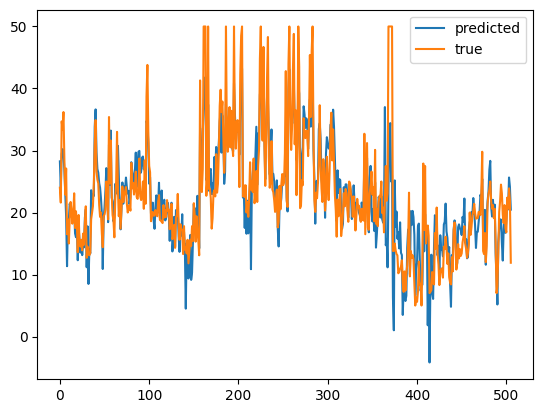

In [28]:
plt.plot(pred, label='predicted')
plt.plot(y, label='true')
plt.legend()
plt.show()

In [31]:
from sklearn.metrics import r2_score

In [32]:
r2_score(y.values, pred)

0.7498672428773164

In [33]:
len(x.columns)

20

In [36]:
import numpy as np
new_data = np.random.rand(100, 20)
test = pd.DataFrame(data = new_data, columns = x.columns)

In [37]:
test

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,CHAS_0_dummy,RAD_1_dummy,RAD_2_dummy,RAD_3_dummy,RAD_5_dummy,RAD_4_dummy,RAD_8_dummy,RAD_6_dummy,RAD_7_dummy
0,0.289204,0.540269,0.510701,0.179619,0.864669,0.742149,0.364924,0.685941,0.941132,0.135856,0.739269,0.243886,0.187612,0.337124,0.946025,0.176767,0.175402,0.885460,0.070290,0.537490
1,0.566249,0.756579,0.248359,0.699246,0.257110,0.688250,0.869089,0.400383,0.143809,0.235674,0.955082,0.919902,0.522571,0.502692,0.465492,0.973489,0.894270,0.086746,0.682631,0.969905
2,0.729391,0.180157,0.255134,0.593663,0.854530,0.546626,0.043123,0.534217,0.921146,0.753376,0.043814,0.160558,0.356513,0.067031,0.565992,0.754603,0.619792,0.442940,0.424567,0.631894
3,0.327268,0.513413,0.580529,0.207318,0.108061,0.392508,0.974762,0.254622,0.367008,0.106867,0.312322,0.012875,0.748318,0.502074,0.792357,0.576437,0.529588,0.380741,0.730510,0.297426
4,0.548452,0.849476,0.415772,0.106503,0.312590,0.900830,0.028423,0.764821,0.586186,0.169814,0.660247,0.206420,0.427629,0.437906,0.692839,0.307135,0.947664,0.930798,0.403631,0.705578
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.785895,0.005039,0.028364,0.242372,0.793389,0.380587,0.746936,0.947434,0.520766,0.561771,0.422268,0.904057,0.212120,0.489827,0.456642,0.898412,0.167944,0.943176,0.184228,0.235962
96,0.205129,0.491998,0.283208,0.178659,0.056706,0.952782,0.609711,0.106330,0.057230,0.687810,0.768857,0.033753,0.570605,0.393402,0.450339,0.404176,0.193523,0.659264,0.057749,0.312788
97,0.797386,0.062458,0.227892,0.628461,0.133768,0.303550,0.842588,0.323298,0.428185,0.628131,0.114099,0.576175,0.910902,0.252776,0.380960,0.125485,0.733840,0.319940,0.958659,0.022584
98,0.426283,0.922140,0.481670,0.343412,0.732761,0.385039,0.743202,0.015323,0.409975,0.245125,0.457631,0.583426,0.605278,0.035619,0.980000,0.493028,0.930745,0.284628,0.398707,0.698121


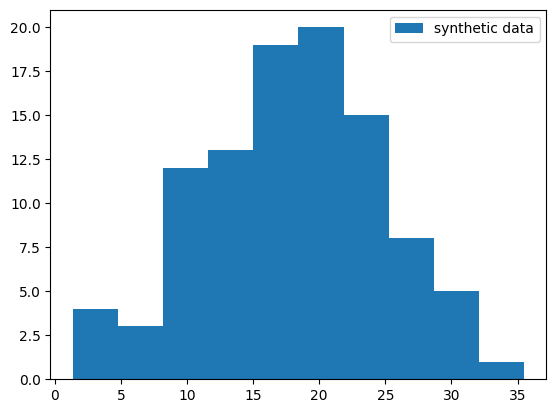

In [38]:
pred_test = reg.predict(test)
plt.hist(pred_test, label='synthetic data')
plt.legend()
plt.show()

In [39]:
### decision tree 
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor().fit(x, y)

In [40]:
pred_dt = dt_model.predict(x)
r2_score(y.values, pred_dt)

1.0

In [42]:
from sklearn.tree import plot_tree
plot_tree(dt_model)
plt.show()


KeyboardInterrupt



In [47]:
### decision tree 
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=1).fit(x, y)
lasso_pred = lasso.predict(x)
r2_score(y.values, lasso_pred)

0.6722532906713199